In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import matplotlib.cm as cmx

In [24]:
folder = ""
file = "london_underground"
ext = ".npy"
london_underground = np.load( folder+file+ext )

In [4]:
london_underground_G = nx.to_networkx_graph(london_underground)

In [36]:
import pandas as pd
london_coords = pd.read_csv("C:\Users\palme\OneDrive\Desktop\MATH1010\networks final project\london_transport_nodes.txt")
print(london_coords)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (1068357108.py, line 2)

In [54]:
coordinates = []
with open('london_transport_nodes.txt', 'r') as fd:
    lines = fd.readlines()
    for line in lines:
        x = line.split(' ')[2]
        y = line.split(' ')[3][:-1]
        coords = tuple((float(y), float(x)))
        coordinates.append(coords)

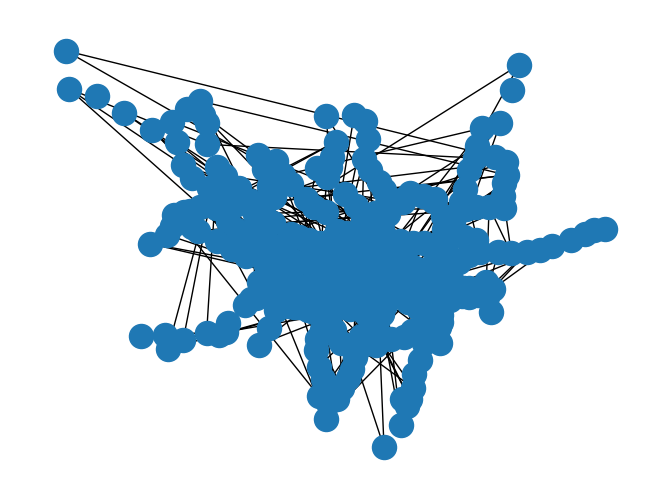

In [71]:
nx.draw(london_underground_G, pos = coordinates)

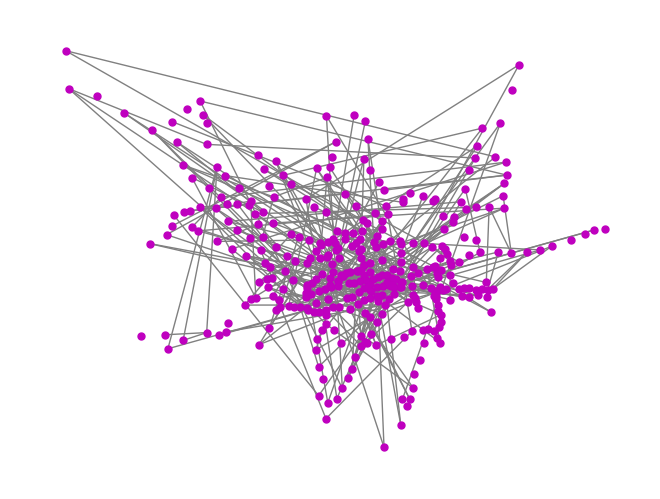

In [81]:
nx.draw(london_underground_G, pos = coordinates, node_color='m', node_size=25, edge_color='grey',  with_labels=False)

In [43]:
N=len(london_underground_G)

The Nodes represent stations in London's underground transportation network.

In [44]:
print('There are', N, 'nodes.')

There are 369 nodes.


The edges represent transit routes between stations. Each edge is weighted by the number of different transit routes that connect the two stations associated with the edge.  

In [45]:
print('There are',london_underground_G.number_of_edges(),'edges.')

There are 312 edges.


This graph is undirected, as an edge connects two nodes if there is (at least) one transit route between them.

This graph is connected, which makes sense contextually since there should be a path between any two stations. 

The London Underground has been an ongoing project since early in the 19th century. The first line to open was the Metropolitan Railway in 1863, and has since extended outwards to include 369 stations.  

In [46]:

comm = nx.algorithms.community.girvan_newman(london_underground_G)
#l_u_communities = tuple(sorted(c) for c in next(comm))

k = 11 #number of partitions

limited = itertools.takewhile(lambda c: len(c) <= k, comm)

for communities in limited:
    l_u_communities = (tuple(sorted(c) for c in communities))
    

def Plot_Comm(Network, C, position = None):
    cmap = cmx.get_cmap(name='rainbow')
    N = len(Network.nodes())
    K = len(C)
    color_map = ['k']*N
    for i in range(K):
        for j in range(len(C[i])):
            color_map[ C[i][j] ] = cmap(i/K)
    if position is None:
        pos = nx.spring_layout(Network, k=0.25,iterations=20)
    else:
        pos = position
    fig = plt.figure()
    nx.draw(Network, pos, node_color=color_map, node_size=25, edge_color='grey', with_labels=False)
    plt.show()
    return




commT = nx.algorithms.community.girvan_newman(london_underground_G)
l_u_communitiesT = tuple(sorted(c) for c in next(commT))

Tech_Friends_G_pos = nx.spring_layout(london_underground_G, k=.1)

Plot_Comm(london_underground_G, l_u_communities, pos)

NameError: name 'l_u_communities' is not defined

In [ ]:
 Names = []
 with open('london_underground_names.txt', 'r') as fd:
     lines = fd.readlines()
 for line in lines:
    name = line.split('\n')[0]
    Names.append(name)
   

In [49]:
a = nx.degree_centrality(london_underground_G)
d = nx.closeness_centrality(london_underground_G)
b = nx.eigenvector_centrality(london_underground_G)
c = nx.betweenness_centrality(london_underground_G)

print('The station with highest degree centrality is', max(a, key=lambda key: a[key]))
print('The station with highest closeness centrality is', max(d, key=lambda key: d[key]))
print('The station with highest eigenvector centrality is', max(b, key=lambda key: b[key]))
print('The station with highest betweenness centrality is', max(c, key=lambda key: c[key]))

The station with highest degree centrality is 26
The station with highest closeness centrality is 66
The station with highest eigenvector centrality is 67
The station with highest betweenness centrality is 26


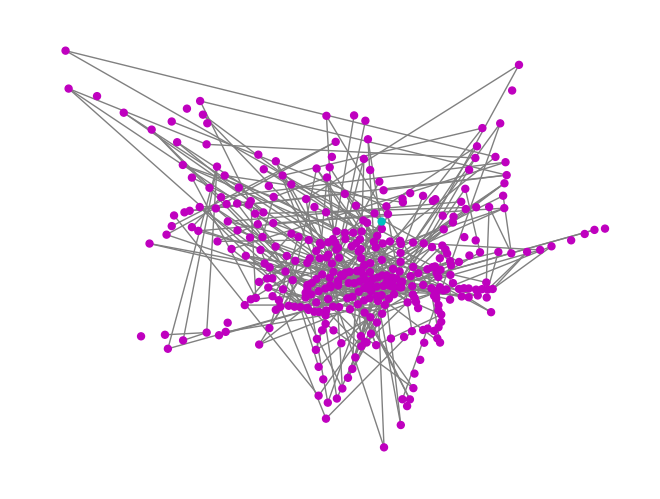

In [75]:
colors = ['m'] * len(london_underground_G)
len(london_underground_G)
colors[26] = 'c'
nx.draw(london_underground_G, pos = coordinates, node_color=colors, node_size=25, edge_color='grey', with_labels=False)

The above network displays one of the four metrics of centrality in which node 35, or London Bridge station, has the highest degree centrality.

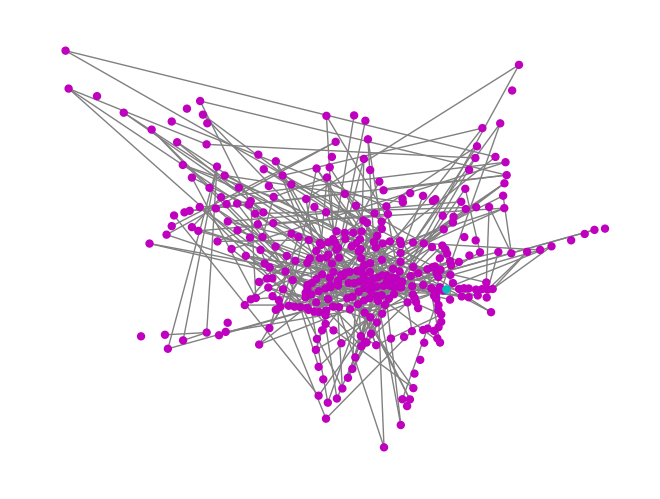

In [77]:
colors = ['m'] * len(london_underground_G)
len(london_underground_G)
colors[66] = 'c'
nx.draw(london_underground_G, pos = coordinates, node_color=colors, node_size=25, edge_color='grey', with_labels=False)

In [ ]:
The above network displays one of the four metrics of centrality in wich node 66, or Bethnal Green station, has the highest closeness centrality.

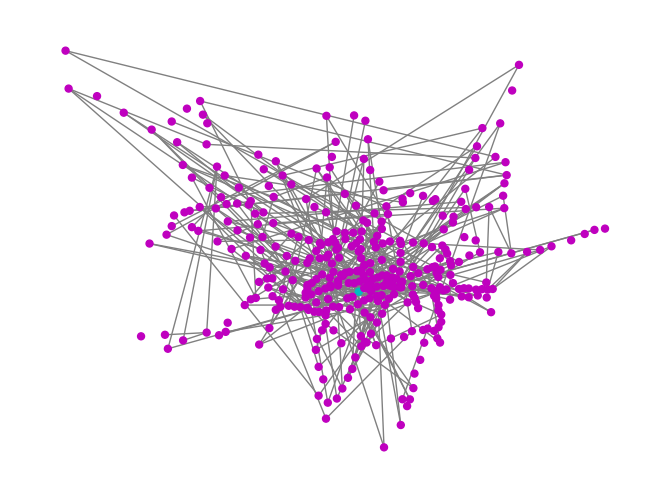

In [78]:
colors = ['m'] * len(london_underground_G)
len(london_underground_G)
colors[67] = 'c'
nx.draw(london_underground_G, pos = coordinates, node_color=colors, node_size=25, edge_color='grey', with_labels=False)

The above network displays one of four metrics of centrality in which node 67, or Mile End Station, has the highest eigenvector centrality.

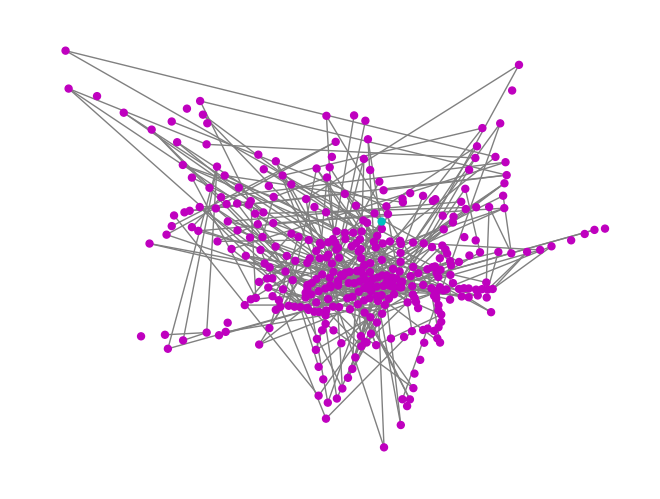

In [79]:
colors = ['m'] * len(london_underground_G)
len(london_underground_G)
colors[26] = 'c'
nx.draw(london_underground_G, pos = coordinates, node_color=colors, node_size=25, edge_color='grey', with_labels=False)

The above network displays one of four metrics of centrality in which node 26, or Beckton Park station, has the highest betweenness centrality.

In [50]:
clustering = nx.algorithms.clustering(london_underground_G)
print('The node with lowest clustering coefficient is', min(clustering, key=lambda key: clustering[key]))

average_cc = nx.algorithms.average_clustering(london_underground_G)
print('The average clustering coefficient for the London Underground network is ', average_cc)

The node with lowest clustering coefficient is 0
The average clustering coefficient for the London Underground network is  0.03111931119311194


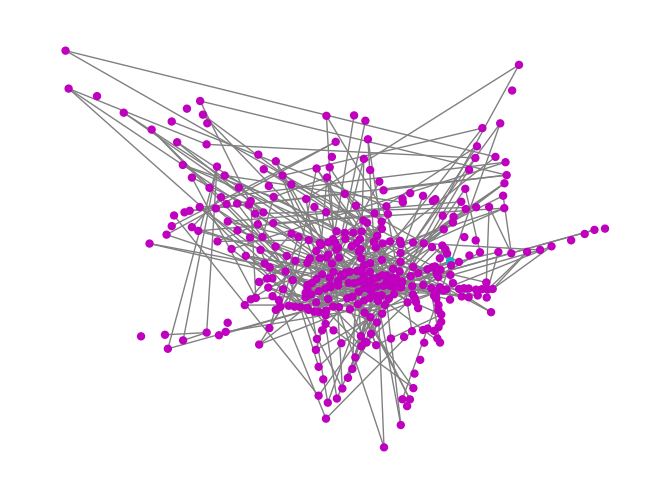

In [80]:
colors = ['m'] * len(london_underground_G)
len(london_underground_G)
colors[0] = 'c'
nx.draw(london_underground_G, pos = coordinates, node_color=colors, node_size=25, edge_color='grey', with_labels=False)

The network above displays the node 0, or Abbey Road station, with the lowest clustering coefficient of 0. Of Abbey Road station's four connections, Westham station, Acton Central Station, Willesden Junction station, and Acton Town station, none of them are connected amongst each other. In the context of the underground, the only way to commute via tube from any of those preivously mentioned stations to another is to travel to Abbey Road station. The average clustering coefficient for the London Underground network is  0.03111931119311194. This means that, on average, the only way to commute between two stations that share a coomon neighbor is to travel to the station they share an edge with.